In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
from plotly import tools
import plotly.express as px
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading data
df = pd.read_csv('creditcard.csv')

In [5]:
df.shape

(284807, 31)

In [6]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#statistical summary of all the numerical variables in dataset
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [9]:
#checking missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total  Percent
Time        0      0.0
V16         0      0.0
Amount      0      0.0
V28         0      0.0
V27         0      0.0
V26         0      0.0
V25         0      0.0
V24         0      0.0
V23         0      0.0
V22         0      0.0
V21         0      0.0
V20         0      0.0
V19         0      0.0
V18         0      0.0
V17         0      0.0
V15         0      0.0
V1          0      0.0
V14         0      0.0
V13         0      0.0
V12         0      0.0
V11         0      0.0
V10         0      0.0
V9          0      0.0
V8          0      0.0
V7          0      0.0
V6          0      0.0
V5          0      0.0
V4          0      0.0
V3          0      0.0
V2          0      0.0
Class       0      0.0

Exploratory Data Analysis

In [10]:
#Imbalance in target
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
#company's campaingn ids' composition
im = df['Class'].value_counts()
im_df = pd.DataFrame({'labels': im.index,'values': im.values})
px.pie(im_df, names ='labels',values='values', title='Target Imbalance Distribution', hole = 0.5)

In [12]:
# Evidently, data is highly imbalanced. Only 0.173% transactions are fradulent.

Visualizing distributions of all numerical variables.

In [13]:
#Function for visualizing distribution of numerical variables, box plot
def dist_plot(x):
    ax = sns.distplot(x = df[x], color = 'darkolivegreen')
    ax.set_title('{} distribution'.format(x), fontsize = 12, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)

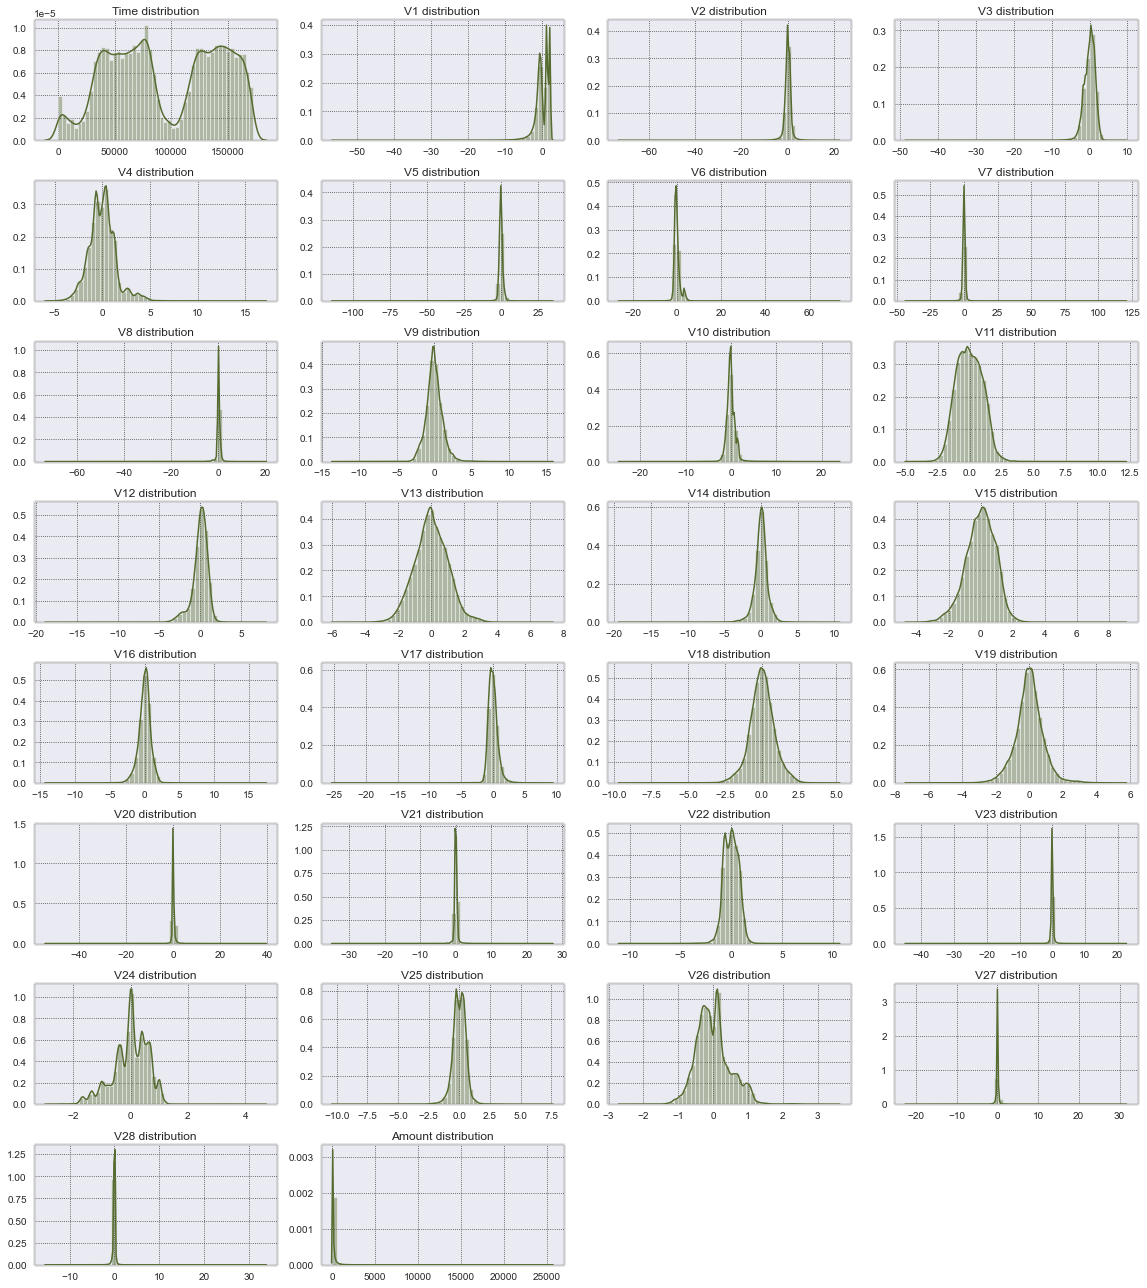

In [14]:
plt.figure(figsize = [16,18])
cols = [col for col in df.columns if col != 'Class']
for i in range(30):
    plt.subplot(8,4,i+1)
    dist_plot(cols[i])
    plt.ylabel('')
    #plt.yticks([])
plt.tight_layout()
plt.show()

In [15]:
x = df.Time/3600
x.describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64

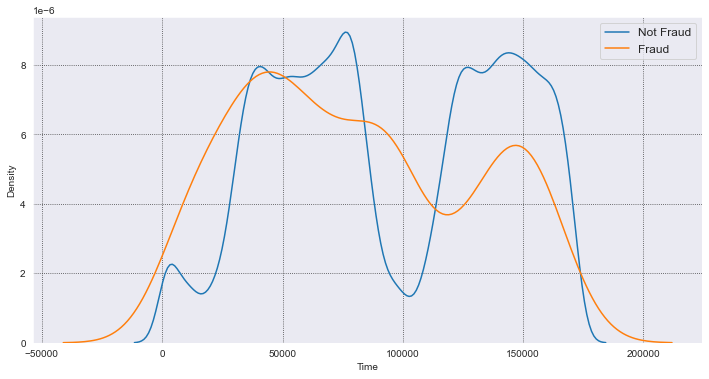

In [16]:
#Time
plt.figure(figsize = [12,6])
sns.kdeplot(df[df.Class == 0].Time, label = 'Not Fraud')
sns.kdeplot(df[df.Class == 1].Time, label = 'Fraud')
plt.legend(fontsize = 12)

Fraudulent transaction are more evenly distributed than non-fraudulent ones. It looks like fraudulent transactions 
were relatively lesser at higher time(the seconds elapsed between each transaction and the first transaction).

<AxesSubplot:xlabel='Amount'>

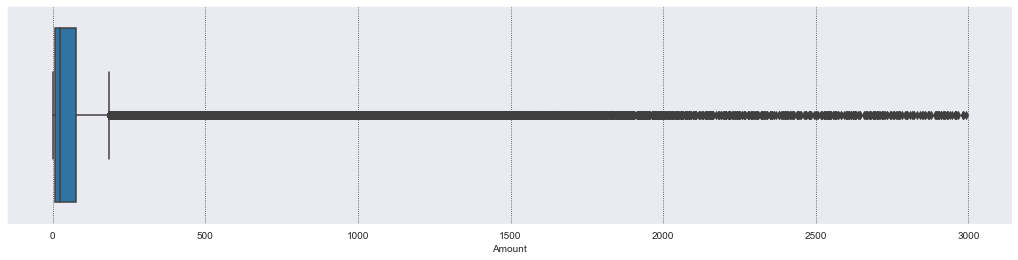

In [17]:
#Distribution of Transaction Amount
plt.figure(figsize = [18,4])
sns.boxplot(df.Amount[df.Amount < 3000])

In [18]:
df[df.Amount < 3000].Class.value_counts(normalize = True)*100

0    99.827076
1     0.172924
Name: Class, dtype: float64

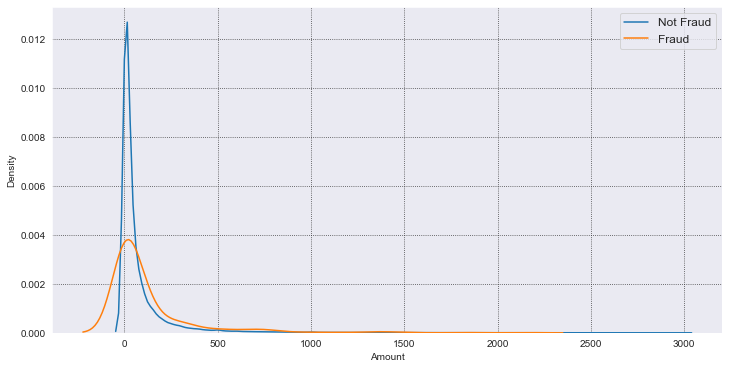

In [19]:
#Transaction Amount
plt.figure(figsize = [12,6])
sns.kdeplot(df[(df.Class == 0) & (df.Amount < 3000)].Amount, label = 'Not Fraud')
sns.kdeplot(df[(df.Class == 1) & (df.Amount < 3000)].Amount, label = 'Fraud')
plt.legend(fontsize = 12)

<AxesSubplot:xlabel='Class', ylabel='Amount'>

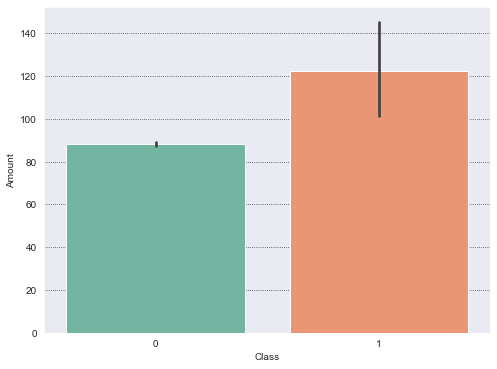

In [20]:
#Average transaction Amount for the two classes
plt.figure(figsize = [8,6])
sns.barplot(x = df.Class, y = df.Amount, estimator = np.mean, palette = 'Set2')

<AxesSubplot:xlabel='Class', ylabel='Amount'>

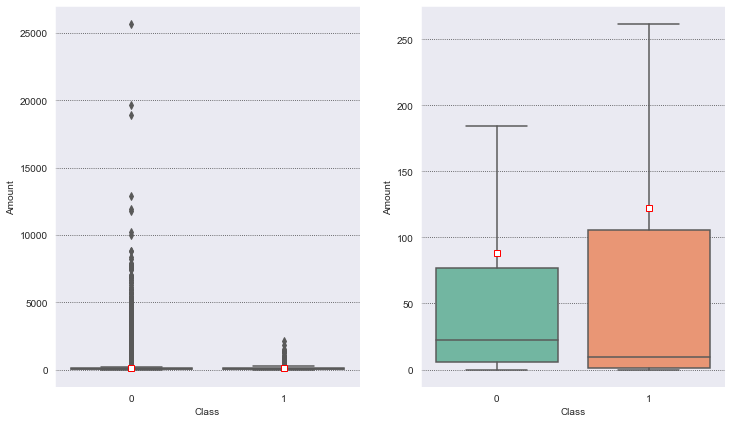

In [21]:
#Distribution of transaction amount for the two classes
plt.figure(figsize = [12,7])
plt.subplot(121)
sns.boxplot(x = df.Class, y = df.Amount, palette = 'Set2', showmeans = True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})
plt.subplot(122)
sns.boxplot(x = df.Class, y = df.Amount, palette = 'Set2', showmeans = True, showfliers = False, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})

It is evident that the average fraudulent transaction amount is greater than the average non-fraudulent transaction amount.

Correlation Matrix

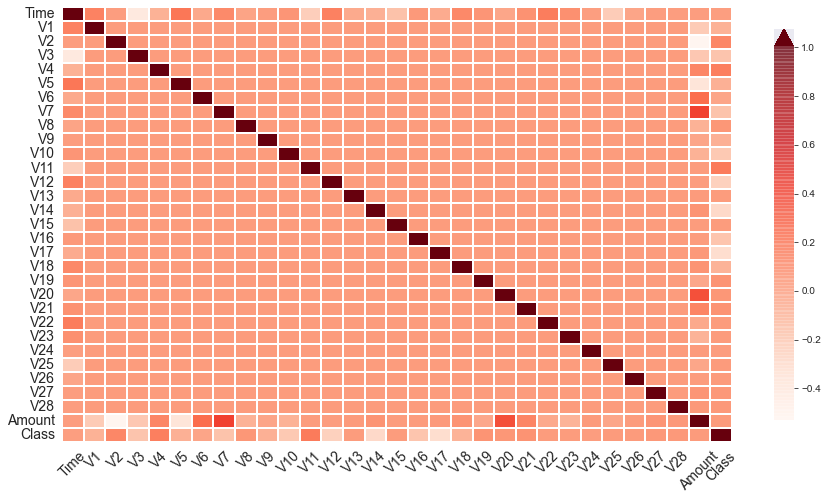

In [22]:
plt.figure(figsize = [15,8])
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(df.corr(), annot = False, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

There are no multi-colinearity in data. There are no notable correlations between variables. However, we observe some
positive correlation between V7 and Amount, and V20 and Amount, and some negative correlation is observed between V2 
and Amount,and V3 and Time.

<AxesSubplot:xlabel='V2', ylabel='Amount'>

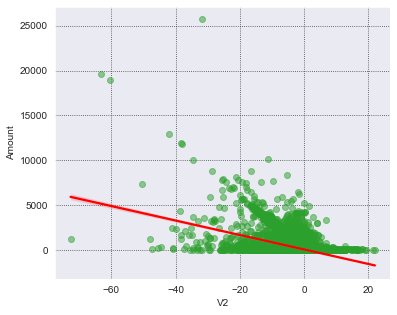

In [23]:
plt.figure(figsize = [6,5])
sns.regplot(df['V2'], df['Amount'], line_kws = {'color':'red'}, 
            scatter_kws = {'alpha': 0.5}, color = 'tab:green')

<AxesSubplot:xlabel='V7', ylabel='Amount'>

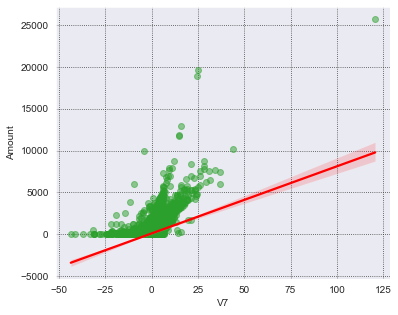

In [24]:
plt.figure(figsize = [6,5])
sns.regplot(df['V7'], df['Amount'], line_kws = {'color':'red'}, scatter_kws = {'alpha': 0.5}, color = 'tab:green')

The variables appear to be correlated to some extent. Moving forward to Modelling where we can eliminate these features based on p-values.

Data Modelling

In [25]:
#splitting features from target
features = [col for col in df.columns if col != 'Class']
X = df[features]
y = df['Class']

In [26]:
cols = X.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [27]:
Xa = np.array(X)
ya = np.array(y.tolist())

In [28]:
# Splitting the data into train and test
skf = StratifiedKFold(n_splits = 5, shuffle = True)
for train_index, test_index in skf.split(Xa, ya):
    X_train, y_train = Xa[train_index], ya[train_index]
    X_test, y_test = Xa[test_index], ya[test_index]
    break

In [29]:
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [30]:
X_train.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3  0.647376 -0.221929  0.062723  0.061458  123.50  
4 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 30 columns]

In [31]:
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [32]:
#Feature Scaling
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

Model Building

### Logistic Regression

In [33]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
29   Amount  12.43
2        V2   4.55
7        V7   2.89
5        V5   2.84
20      V20   2.46
3        V3   1.89
0      Time   1.88
1        V1   1.67
6        V6   1.57
23      V23   1.16
21      V21   1.15
4        V4   1.14
8        V8   1.13
25      V25   1.13
10      V10   1.13
11      V11   1.12
22      V22   1.09
15      V15   1.06
19      V19   1.04
14      V14   1.03
12      V12   1.03
18      V18   1.03
9        V9   1.02
17      V17   1.01
13      V13   1.01
27      V27   1.01
16      V16   1.00
24      V24   1.00
26      V26   1.00
28      V28   1.00

In [35]:
#logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_train_prob = lr_model.predict_proba(X_train)[:,1]

In [36]:
#In-sample accuracy, confusion matrix for cut-off of 0.5
y_train_pred = np.array([1 if i > 0.5 else 0 for i in y_train_prob])
print('In-sample accuracy score : {}\n'.format(round(accuracy_score(y_train, y_train_pred), 3)))
print('In-sample confusion matrix: \n {}'.format(confusion_matrix(y_train, y_train_pred)))

In-sample accuracy score : 0.999

In-sample confusion matrix: 
 [[227416     36]
 [   154    239]]


In [37]:
y_pred = lr_model.predict_proba(X_test)[:,1]

In [38]:
#creating a dataframe to store y_test, and predictions together
lm_pred = pd.DataFrame({'y_test': y_test, 'fraud_prob': y_pred})
#obtaining results for a cut-off of 0.5
lm_pred['predicted'] = lm_pred.fraud_prob.map(lambda x: 1 if x > 0.5 else 0)
lm_pred.head()

y_test  fraud_prob  predicted
0       0    0.001362          0
1       0    0.000848          0
2       0    0.000532          0
3       0    0.000732          0
4       0    0.000683          0

In [39]:
from sklearn.metrics import classification_report
print(classification_report(lm_pred['y_test'], lm_pred['predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.60      0.72        99

    accuracy                           1.00     56962
   macro avg       0.95      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



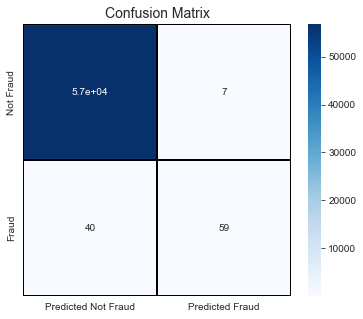

In [40]:
#Confusion Matrix for test data
cm = confusion_matrix(lm_pred['y_test'], lm_pred['predicted'])
cm_df = pd.DataFrame(data = cm)
plt.figure(figsize = (6,5))
sns.heatmap(cm_df, 
            yticklabels=['Not Fraud', 'Fraud'],
            xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
            annot=True,
            linewidths=.2,linecolor="k", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    

    return None

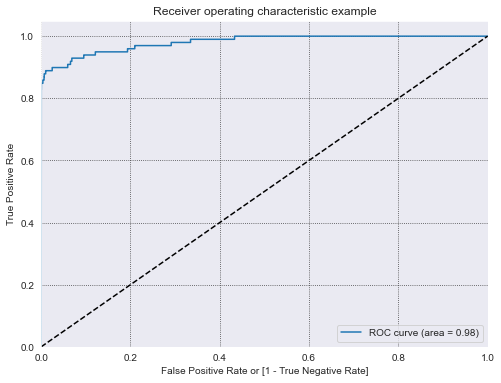

In [42]:
plot_roc(lm_pred['y_test'], lm_pred['fraud_prob'])
plt.legend(loc="lower right")
plt.show()

Finding Optimal Cutoff Point

In [43]:
lm_pred.head()

y_test  fraud_prob  predicted
0       0    0.001362          0
1       0    0.000848          0
2       0    0.000532          0
3       0    0.000732          0
4       0    0.000683          0

In [44]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lm_pred[i]= lm_pred['fraud_prob'].map(lambda x: 1 if x > i else 0)
lm_pred.head()

y_test  fraud_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0       0    0.001362          0    1    0    0    0    0    0    0    0    0   
1       0    0.000848          0    1    0    0    0    0    0    0    0    0   
2       0    0.000532          0    1    0    0    0    0    0    0    0    0   
3       0    0.000732          0    1    0    0    0    0    0    0    0    0   
4       0    0.000683          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [45]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob_thresh','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = confusion_matrix(lm_pred['y_test'], lm_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob_thresh  accuracy     sensi     speci
0.0          0.0  0.001738  1.000000  0.000000
0.1          0.1  0.999438  0.818182  0.999754
0.2          0.2  0.999386  0.737374  0.999842
0.3          0.3  0.999368  0.707071  0.999877
0.4          0.4  0.999280  0.656566  0.999877
0.5          0.5  0.999175  0.595960  0.999877
0.6          0.6  0.999140  0.565657  0.999894
0.7          0.7  0.999070  0.525253  0.999894
0.8          0.8  0.998999  0.484848  0.999894
0.9          0.9  0.998894  0.424242  0.999894


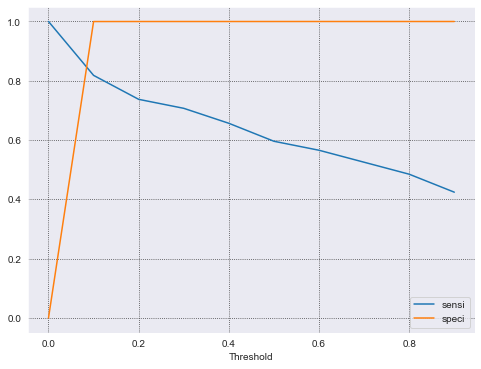

In [46]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob_thresh', y=['sensi','speci'], figsize=(8, 6))
plt.xlabel('Threshold')
plt.show()

We would like both sensitivity and specificity to be high. For the given context, we would like to detect as many fraudulent transactions as possible accurately and therefore more focus should be on sensitivity.

At the same time we also would not want customers to have a bad experience because our algorithm detects their non-fraudulent trasactions as fraudulent. So, it also becomes important to focus on specificity. let's look at confusion matrix with threshold 0.2

In [47]:
#confusion matrix for cut-off of 0.1
y_predf = np.array([1 if i > 0.2 else 0 for i in y_pred])
print('Test confusion matrix: \n\n {}'.format(confusion_matrix(y_test, y_predf)))

Test confusion matrix: 

 [[56854     9]
 [   26    73]]


Precision and recall tradeoff

In [48]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(lm_pred['y_test'], lm_pred['fraud_prob'])

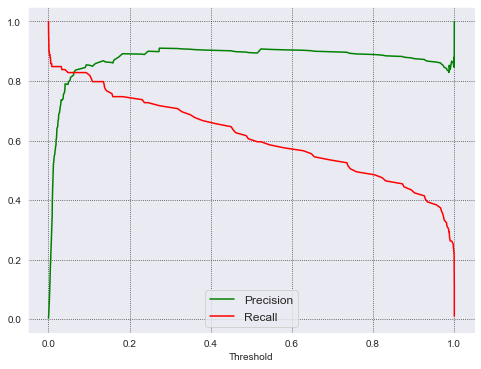

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')
plt.xlabel('Threshold')
plt.legend(fontsize = 12)
plt.show()

From precision-recall trade-off we can say that the most optimal threshold would be 0.1 but again, it depends on whether the problem demands us to focus on false-nagatives more or false-positives more.

### RandomForrest Classifier

In [50]:
#creating a rf classification model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)

In [51]:
#In-sample accuracy, confusion matrix
print('In-sample accuracy score : {}\n'.format(round(accuracy_score(y_train, y_train_pred), 3)))
print('In-sample confusion matrix: \n {}'.format(confusion_matrix(y_train, y_train_pred)))

In-sample accuracy score : 1.0

In-sample confusion matrix: 
 [[227452      0]
 [     0    393]]


In [52]:
#prediction on test data
y_pred = rf_model.predict(X_test)

In [53]:
#Out of sample accuracy, confusion matrix
print('test accuracy score : {}\n'.format(round(accuracy_score(y_test, y_pred), 3)))
rf_cm = confusion_matrix(y_test, y_pred)
print('test confusion matrix: \n {}'.format(rf_cm))

test accuracy score : 1.0

test confusion matrix: 
 [[56862     1]
 [   21    78]]


Randomforrest classifier with default parameters was able to perform better than logistic regression model.

### SVM Classifier

In [54]:
sX_train = X_train.sample(frac = 0.5)
sy_train = y_train[sX_train.index]
sX_test = X_test.sample(frac = 0.5)
sy_test = y_test[sX_test.index]

In [55]:
#Creating svm estimator object using sklearn
svc_model = svm.SVC(kernel='linear')
svc_model.fit(sX_train, sy_train)
y_train_pred = svc_model.predict(sX_train)

In [56]:
#In-sample accuracy, confusion matrix
print('In-sample accuracy score : {}\n'.format(round(accuracy_score(sy_train, y_train_pred), 3)))
print('In-sample confusion matrix: \n {}'.format(confusion_matrix(sy_train, y_train_pred)))

In-sample accuracy score : 0.999

In-sample confusion matrix: 
 [[113696     30]
 [    37    159]]


In [57]:
#prediction on test data
y_pred = svc_model.predict(sX_test)

In [58]:
#Out of sample accuracy, confusion matrix
print('test accuracy score : {}\n'.format(round(accuracy_score(sy_test, y_pred), 3)))
svc_cm = confusion_matrix(sy_test, y_pred)
print('test confusion matrix: \n {}'.format(svc_cm))

test accuracy score : 1.0

test confusion matrix: 
 [[28429     5]
 [    8    39]]


In [59]:
#Precision and Recall score of RF model
rf_pr = rf_cm[1,1] / (rf_cm[1,1] + rf_cm[0,1])    #Precision score
rf_re = rf_cm[1,1] / (rf_cm[1,0] + rf_cm[1,1])    #Recall score
rf_pr, rf_re

(0.9873417721518988, 0.7878787878787878)

In [60]:
#Precision and Recall score of SVM model
svc_pr = svc_cm[1,1] / (svc_cm[1,1] + svc_cm[0,1])    #Precision score
svc_re = svc_cm[1,1] / (svc_cm[1,0] + svc_cm[1,1])    #Recall score
svc_pr, svc_re

(0.8863636363636364, 0.8297872340425532)

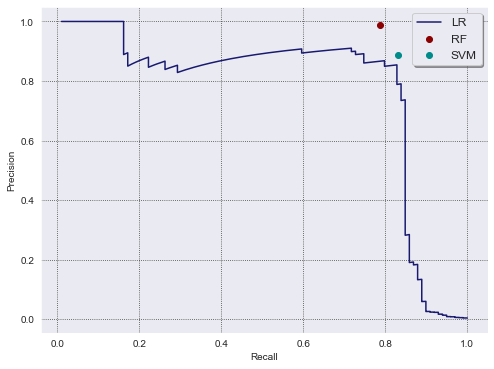

In [61]:
plt.figure(figsize = [8,6])
plt.plot(r[:-1], p[:-1], "midnightblue", label = 'LR')
plt.scatter(rf_re, rf_pr, color = 'darkred', label = 'RF')
plt.scatter(svc_re, svc_pr, color = 'darkcyan', label = 'SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize = 12, shadow = True)
plt.show()